# Importing libraries

This is a massive projec I used almost every suitable library for making models and I did a little bit of optimization on it

by the way link to the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
(if you search hart diseas dataset you will find it ont the internet)

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing data

In [4]:
data=pd.read_csv("Desktop/data/heart.csv")

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


# Preprocessing

<AxesSubplot:>

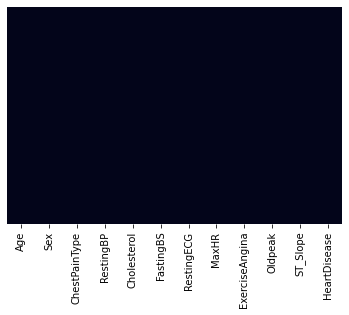

In [7]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False)

**Lets convert them to numerical**

These are binary columns

In [9]:
frame=pd.get_dummies(data["Sex"],drop_first=True)
data["Sex"]=frame
frame=pd.get_dummies(data["ExerciseAngina"],drop_first=True)
data["ExerciseAngina"]=frame

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


These are non-binary ones

In [10]:
def ChestPainType(cpt):
    answere=[]
    for x in cpt:
        if x=="ATA":
            answere.append(0)
        elif x=="NAP":
            answere.append(1)
        else:
            answere.append(2)
            
    return answere

In [11]:
p=ChestPainType(data["ChestPainType"])

In [12]:
data["ChestPainType"]=p

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,1,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,0,130,283,0,ST,98,0,0.0,Up,0
3,48,0,2,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,1,150,195,0,Normal,122,0,0.0,Up,0


In [14]:
def ResingECG(cpt):
    answere=[]
    for x in cpt:
        if x=="Normal":
            answere.append(0)
        elif x=="LVH":
            answere.append(1)
        else:
            answere.append(2)
            
    return answere

In [15]:
p=0
p=ResingECG(data["RestingECG"])
data["RestingECG"]=p

In [16]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,Up,0
1,49,0,1,160,180,0,0,156,0,1.0,Flat,1
2,37,1,0,130,283,0,2,98,0,0.0,Up,0
3,48,0,2,138,214,0,0,108,1,1.5,Flat,1
4,54,1,1,150,195,0,0,122,0,0.0,Up,0


In [17]:
def ST_Slop(cpt):
    answere=[]
    for x in cpt:
        if x=="Up":
            answere.append(1)
        elif x=="Down":
            answere.append(-1)
        else:
            answere.append(0)
            
    return answere

In [18]:
p=0
p=ST_Slop(data["ST_Slope"])
data["ST_Slope"]=p

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,0,130,283,0,2,98,0,0.0,1,0
3,48,0,2,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


**correlation of parameters**

<AxesSubplot:>

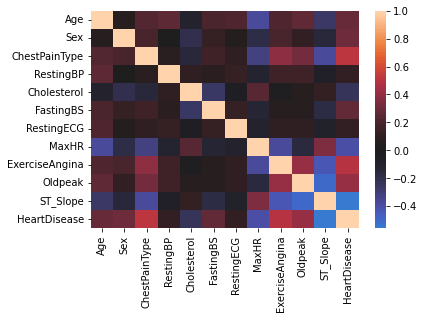

In [22]:
sb.heatmap(data.corr(),center=0)

This plot show that men get hart diseas earlier than women

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

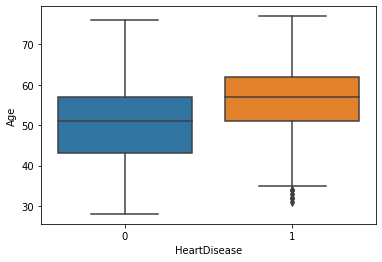

In [23]:
sb.boxplot(data["HeartDisease"],data["Age"])

# First: knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier()

In [28]:
x=data.drop(["HeartDisease"],axis=1)
y=data["HeartDisease"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
KnnPredicion=knn.predict(x_test)

# Evaluating KNN

In [33]:
print(metrics.confusion_matrix(KnnPredicion,y_test))

[[ 77  35]
 [ 50 141]]


In [34]:
print(metrics.classification_report(KnnPredicion,y_test))

              precision    recall  f1-score   support

           0       0.61      0.69      0.64       112
           1       0.80      0.74      0.77       191

    accuracy                           0.72       303
   macro avg       0.70      0.71      0.71       303
weighted avg       0.73      0.72      0.72       303



this was terrible :)

# Second: DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier()

In [37]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dtcPrediction=dtc.predict(x_test)

# Evaluating DecisionTreeClassifier

In [39]:
print(metrics.classification_report(dtcPrediction,y_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       117
           1       0.85      0.81      0.83       186

    accuracy                           0.80       303
   macro avg       0.78      0.79      0.79       303
weighted avg       0.80      0.80      0.80       303



less terrible :)

# Third: RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc=RandomForestClassifier()

In [111]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
rfcPrediction=rfc.predict(x_test)

# Evaluating RandomForestClassifier

In [113]:
print(metrics.classification_report(rfcPrediction,y_test))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.92      0.85      0.88       191

    accuracy                           0.86       303
   macro avg       0.85      0.86      0.85       303
weighted avg       0.87      0.86      0.86       303



perfect :))))))))))))))

# Forth: Search vector machine

In [45]:
from sklearn.svm import SVC

In [46]:
svm=SVC()

In [47]:
svm.fit(x_train,y_train)

SVC()

In [48]:
svmPredicion=svm.predict(x_test)

# Evaluating SVM

In [49]:
print(metrics.classification_report(svmPredicion,y_test))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       125
           1       0.80      0.79      0.79       178

    accuracy                           0.76       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.76      0.76      0.76       303



# LETS OPTIMIZE THEM

In [52]:
from sklearn.model_selection import GridSearchCV

# Optimizing RandomForestClassifier with GridSearchCV

Gride search is not some thing to scare of it.
It is just a loop to find the best input parameters for a model also it is not pivoting on one parameter it will give you the best score out of all parameters

**But** the set back is that you should give your parametes manually so you should know the mathes behainde them to choose the best numbers

In [67]:
opt_rfc=RandomForestClassifier

In [74]:
WantedForRFC={"n_estimators":[100,200,300,400,500,600,700,800,900,1000]}

In [75]:
ResultRFC_Grid=GridSearchCV(
                opt_rfc(),
                WantedForRFC)

In [76]:
ResultRFC_Grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]})

In [77]:
ResultRFC_Grid.best_params_

{'n_estimators': 200}

In [78]:
ResultRFC_Grid.best_score_

0.8699186991869918

**we got a 10 percent more accuracy it may get higher even with another input values for gride search**

# Optimizing SVM with GridSearchCV

In [97]:
WantedForSVC={"C":[1,10,20,30,40,50,100,1000,10000],"gamma":[1,.1,.01,.001,.0001,.00001,.000001]}

In [104]:
opt_SVM=SVC

In [105]:
ResultSVM_Grid=GridSearchCV(
    opt_SVM(),
    WantedForSVC
)

In [106]:
ResultSVM_Grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]})

In [107]:
ResultSVM_Grid.best_params_

{'C': 10000, 'gamma': 1e-06}

In [108]:
ResultSVM_Grid.best_score_

0.8504065040650406

We could not get anything better with those parameters and the default numbers are good for it